In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
def labelNumber(label):
    if label=='CG':return 1
    return 0

In [3]:
dataFrame=pd.read_csv("fake reviews dataset.csv")
dataFrame['New Label']=dataFrame.apply(lambda row: labelNumber(row.label),axis=1)
dataset=dataFrame[['text_','New Label']]
dataset.head()

,text_,New Label
0,"Love this! Well made, sturdy, and very comfor...",1
1,"love it, a great upgrade from the original. I...",1
2,This pillow saved my back. I love the look and...,1
3,"Missing information on how to use it, but it i...",1
4,Very nice set. Good quality. We have had the s...,1


In [4]:
x_train,x_test,y_train,y_test=train_test_split(dataset['text_'],dataset['New Label'],test_size=0.33,random_state=123)

In [5]:
#Vectorizer
tfidfVector=TfidfVectorizer()
x_train_transform=tfidfVector.fit_transform(x_train)

In [6]:
#KNN Classifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_transform,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(tfidfVector.transform(x_test))

Accuracy Score   : 0.56
Precision Score  : 0.53
Recall Score     : 0.98
F1  Score        : 0.69


/Users/ramsharan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ramsharan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


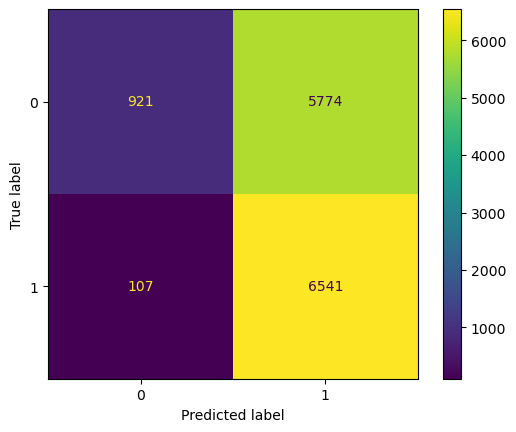

In [8]:
print("Accuracy Score   :",round(accuracy_score(y_test,y_pred),2))
print("Precision Score  :",round(precision_score(y_test,y_pred),2))
print("Recall Score     :",round(recall_score(y_test,y_pred),2))
print("F1  Score        :",round(f1_score(y_test,y_pred),2))
plot_confusion_matrix(model,tfidfVector.transform(x_test),y_test)

In [9]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train_transform,y_train)

RandomForestClassifier()

In [10]:
y_predict=rfc.predict(tfidfVector.transform(x_test))

Accuracy Score   : 0.89
Precision Score  : 0.87
Recall Score     : 0.9
F1  Score        : 0.89


/Users/ramsharan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


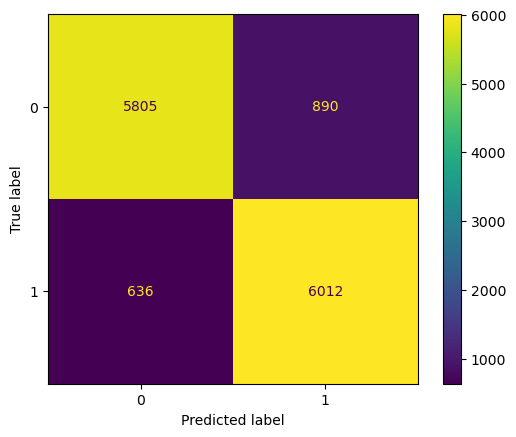

In [11]:
print("Accuracy Score   :",round(accuracy_score(y_test,y_predict),2))
print("Precision Score  :",round(precision_score(y_test,y_predict),2))
print("Recall Score     :",round(recall_score(y_test,y_predict),2))
print("F1  Score        :",round(f1_score(y_test,y_predict),2))
plot_confusion_matrix(rfc,tfidfVector.transform(x_test),y_test)

In [12]:
svm=SVC()
svm.fit(x_train_transform,y_train)

SVC()

In [13]:
y_predict=svm.predict(tfidfVector.transform(x_test))

Accuracy Score   : 0.92
Precision Score  : 0.93
Recall Score     : 0.9
F1  Score        : 0.92


C:\Users\manik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


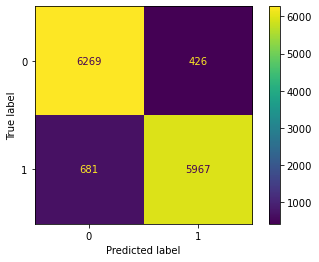

In [15]:
print("Accuracy Score   :",round(accuracy_score(y_test,y_predict),2))
print("Precision Score  :",round(precision_score(y_test,y_predict),2))
print("Recall Score     :",round(recall_score(y_test,y_predict),2))
print("F1  Score        :",round(f1_score(y_test,y_predict),2))
plot_confusion_matrix(svm,tfidfVector.transform(x_test),y_test)

In [16]:
dt=DecisionTreeClassifier()
dt.fit(x_train_transform,y_train)

DecisionTreeClassifier()

In [17]:
y_predict=dt.predict(tfidfVector.transform(x_test))

Accuracy Score   : 0.76
Precision Score  : 0.75
Recall Score     : 0.78
F1  Score        : 0.77


C:\Users\manik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


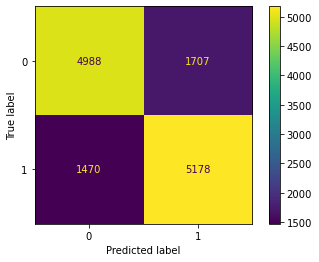

In [18]:
print("Accuracy Score   :",round(accuracy_score(y_test,y_predict),2))
print("Precision Score  :",round(precision_score(y_test,y_predict),2))
print("Recall Score     :",round(recall_score(y_test,y_predict),2))
print("F1  Score        :",round(f1_score(y_test,y_predict),2))
plot_confusion_matrix(dt,tfidfVector.transform(x_test),y_test)

In [20]:
import pickle as pk
file=open('svm.pkl','wb')
pk.dump(svm,file)
file.close()

In [23]:
import pickle as pk
file=open('svm.pkl','rb')
model=pk.load(file)
def predictReview(sentence):
    result=model.predict(tfidfVector.transform([sentence]))
    return result

In [24]:
predictReview("This is a dummy review for testing")

array([0], dtype=int64)